In [3]:
import pandas as pd
import numpy as np
import time

In [4]:
# data_ = pd.read_excel("hasil_prediksi\svm\seleksi/seleksi_all_fuzzy.xlsx") #seleksi_all_fuzzy_18_ribu.xlsx
# data_ = pd.read_excel("hasil_prediksi\svm\seleksi/seleksi_all_fuzzy_18_ribu.xlsx")
data_ = pd.read_excel("data_latih/hasil_seleksi_New3.xlsx")
komentar = data_['komentar'].tolist()
label = data_['label'].tolist()
data_.head()

,Unnamed: 0,label,komentar,komentar_kotor,kode salah
0,0,non spam,homwsti iri banget artis g ajak gengsi sian deh,@homwsti iri bnget artisnya g d ajak acara ber...,0
1,1,non spam,tulis email nama depan dr huruf s,Yang nulis email pasti nama depannya dr huruf S,0
2,2,non spam,salfok sama telinga,Salfok sama telinganya😹😹,0
3,3,non spam,egapratiwwi youtube guankirim lu nan,@egapratiwwi youtubenya udh guankirim ke lu hahha,0
4,4,non spam,abang radit mahh emang keren terimakasih bela ...,"Abang radit mahh emang keren,,,,👏👏👏👍👍👍,,,terim...",0


In [5]:
print(pd.value_counts(data_['label']))
print(15097+3501)
pd.value_counts(data_['label']).plot.bar(title='')

non spam    56562
spam         9707
Name: label, dtype: int64
18598


In [6]:
# from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from stopword import stopwords
stopw = stopwords.stopword()
tfidf = CountVectorizer(stop_words = ['nya','saya','kak'], binary=True)
tfidf_matrix = tfidf.fit_transform(komentar)
print(tfidf_matrix.shape)
Y = np.array(label)
y = Y
X = tfidf_matrix

(66269, 58895)


In [7]:
from sklearn.naive_bayes import ComplementNB

In [8]:
K = 100 #pembagian data uji dan data latih

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score #, precision_score, recall_score
kf= KFold(n_splits=K) 
skf = StratifiedKFold(n_splits=K,random_state=2, shuffle=True)
skf

# alpha_range = np.arange(0.1,2.01,0.01)
# alpha_range = np.arange(2.0,4.01,0.01)
alpha_range = np.arange(0.5,100.05,0.5)

rerata_akurasi_cnb = []
rerata_waktu_eksekusi = []
rerata_waktu_prediksi = []

count=0
for i in range(len(alpha_range)): #melakukan interasi sebanyak data parameter C
    print(round(alpha_range[i],3), end='')
    alpha = alpha_range[i]
    akurasi_cnb = []
    comNB = ComplementNB(alpha = alpha) #model
    waktu_eksekusi = []
    waktu_prediksi = []
    tic = time.perf_counter()
#     for train_index, test_index in kf.split(X): 
    for train_index, test_index in skf.split(X, Y):
            #membagi data latih dan data uji
        X_train, X_test = X[train_index], X[test_index] #pembagian data latih
        y_train, y_test = y[train_index], y[test_index]
    
        #Melatih Model 
        mCNB = comNB.fit(X_train, y_train) 
            
        #proses prediksi
        P_CNB = mCNB.predict(X_test)
        
        start = time.time()
        #Melatih Model
        mCNB = comNB.fit(X_train, y_train)  #SVM
        end = time.time()
        waktu_eksekusi.append(end-start)
            
        #proses prediksi
        start = time.time()
        P_CNB = mCNB.predict(X_test)
        end = time.time()
        waktu_prediksi.append(end-start)
        
    
        akurasi_cnb.append(accuracy_score(y_test, P_CNB))
        print(".", end="")
    toc = time.perf_counter()
#     print("iterasi ke-", count)
        
    rr = sum(akurasi_cnb)/len(akurasi_cnb)
    rerata_akurasi_cnb.append(rr)
    
    rerata_waktu_eksekusi.append(sum(waktu_eksekusi)/len(waktu_eksekusi))
    rerata_waktu_prediksi.append(sum(waktu_prediksi)/len(waktu_prediksi))
    count+=1
    print(rr)
#     print("")
    
#proses mencari parameter dan akurasi terbaik
x = max(rerata_akurasi_cnb)
index = rerata_akurasi_cnb.index(x)
print("---------------------------")
print("alpha terbaik adalah :", round(alpha_range[index],2))
print("             Akurasi :", round(x, 2))

round_akurasi_cnb = []
for i in rerata_akurasi_cnb:
    round_akurasi_cnb.append(round(i,2))
dict_komentar  = {"alpha":alpha_range,"akurasi":rerata_akurasi_cnb, "Akurasi round":round_akurasi_cnb, "waktu eksekusi":rerata_waktu_eksekusi, "waktu prediksi":rerata_waktu_prediksi}
df = pd.DataFrame(dict_komentar,columns = ["alpha","akurasi","Akurasi round", "waktu eksekusi", "waktu prediksi"])
writer = pd.ExcelWriter('data/parameter-akurasi-cnb_fix_countV2.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='cnb-parameter-cnb')

#menyimpan file
writer.save()

0.5....................................................................................................0.9132313028137472
1.0....................................................................................................0.9159317006512182
1.5....................................................................................................0.9184067865699365
2.0....................................................................................................0.9213793372557901
2.5....................................................................................................0.9231147209169953
3.0....................................................................................................0.9253781899068971
3.5....................................................................................................0.9269477976155268
4.0....................................................................................................0.9282908643088974
4.5.....................

33.5....................................................................................................0.9388095894260412
34.0....................................................................................................0.9388246723823008
34.5....................................................................................................0.9387794007296005
35.0....................................................................................................0.9387643633411848
35.5....................................................................................................0.9387794690813661
36.0....................................................................................................0.9387341747133705
36.5....................................................................................................0.9387190461892674
37.0....................................................................................................0.9387039404490859
37.5............

66.5....................................................................................................0.9377834016549023
67.0....................................................................................................0.9377683186986429
67.5....................................................................................................0.9377682959147209
68.0....................................................................................................0.9377532357423835
68.5....................................................................................................0.9377230697612383
69.0....................................................................................................0.9377079868049789
69.5....................................................................................................0.9376929038487194
70.0....................................................................................................0.9376325492397599
70.5............

99.5....................................................................................................0.9362292185241071
100.0....................................................................................................0.9362141128525521
---------------------------
alpha terbaik adalah : 28.0
             Akurasi : 0.94


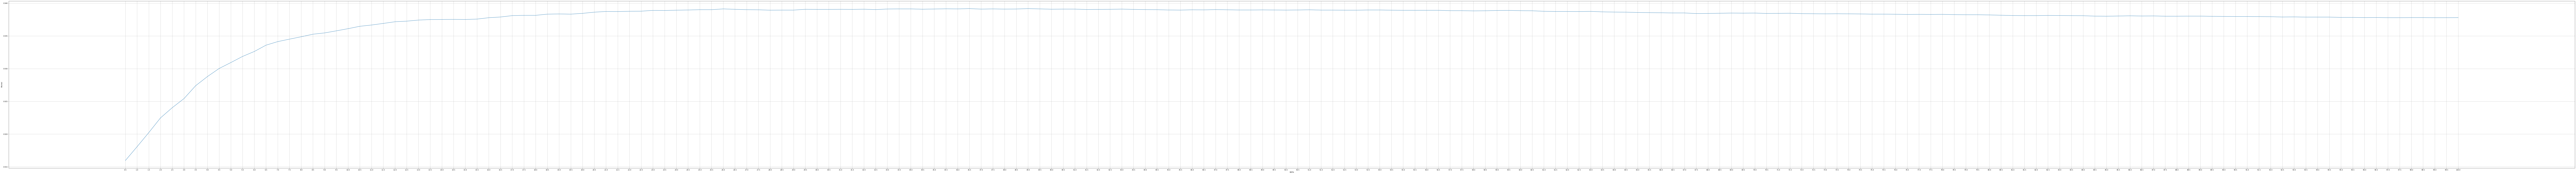

In [15]:
import matplotlib.pyplot as plt
x= df['akurasi'].tolist()
y= df['alpha'].tolist()

plt.figure(figsize=(300,20))
plt.grid(100)
plt.plot(y, x,)
plt.xticks(y)
# plt.xlabel('Akurasi')
plt.ylabel('Akurasi')
plt.xlabel('Aplha')
# for i in range(len(x)):
#     plt.axvline(x[i],0,y[i]) 
plt.show()